In [1]:
# Import all the necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import vader
from collections import Counter
from wordcloud import WordCloud
import datetime
from nltk import ngrams
from nltk.probability import FreqDist
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/emirates/"
pages = 23
page_size = 100

reviews = []
date = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for review in parsed_content.find_all("article", {"itemprop": "review"}):
        # Extract review text
        review_text = review.find("div", {"class": "text_content"}).get_text()
        reviews.append(review_text)

        # Extract date
        try:
            review_date = review.find("div", {"class": "body"}).find("time").get_text()
        except AttributeError:
            review_date = "N/A"
        date.append(review_date)

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2275 total reviews


In [3]:
df = pd.DataFrame({"reviews":reviews, "date":date})
df.head()

,reviews,date
0,✅ Trip Verified | My family experienced very p...,26th June 2023
1,✅ Trip Verified | This review is to appreciat...,25th June 2023
2,✅ Trip Verified | I'm motivated to write this...,24th June 2023
3,✅ Trip Verified | Excellent service. I flew D...,24th June 2023
4,✅ Trip Verified | What a disappointment. Emira...,17th June 2023


In [4]:
cwd = os.getcwd()
df.to_csv(cwd + "/data/Emirates_reviews.csv") # Saves the dataframe as a csv file in the data folder.

In [5]:
# Inspect index 0

df['reviews'].get(0)

'✅ Trip Verified | My family experienced very poor service with Emirates, the issue was with food services, on a 16 hour flight, we get no meal selection, just have to satisfy with leftovers, we were sitting in row 86, 1st time flight attendant says they only have vegetarian meals, ran out of non-vegetarian, the same thing happens at the second meal, also on second time no beverages were served, I had call a flight attendant for beverage service. Not enough time was given to eat our food. May be Emirates would ask customers on their meal preference and stock up accordingly, no beverage services offered at all during the entire flight, we would have to walk up to the service station and ask for water/juice. Hope to see improved services on future Emirates flights.'

#### <b>Data Cleaning </b>

In [6]:
len(df['reviews']) # checks the length of the column "reviews"

2275

In [7]:
# Creates a new column that extracts the information on whether the trip is verified or not

df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified'].value_counts(normalize=True) # Checks the percentage value of the content in this new column.


False    0.665055
True     0.334945
Name: verified, dtype: float64

In [8]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")  
corpus =[]
# Instantiate the WordNetLemmatizer

lemma = WordNetLemmatizer()

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [9]:
# add the corpus to the original dataframe

df['corpus'] = corpus
df

,reviews,date,verified,corpus
0,✅ Trip Verified | My family experienced very p...,26th June 2023,True,family experienced poor service emirate issue ...
1,✅ Trip Verified | This review is to appreciat...,25th June 2023,True,review appreciate service given emirate flying...
2,✅ Trip Verified | I'm motivated to write this...,24th June 2023,True,motivated write critical review multiple phone...
3,✅ Trip Verified | Excellent service. I flew D...,24th June 2023,True,excellent service flew dubai b ham dubai econo...
4,✅ Trip Verified | What a disappointment. Emira...,17th June 2023,True,disappointment emirate lauded one best infligh...
...,...,...,...,...
2270,Cape Town to Bangkok-departed on time excellen...,29th December 2013,False,cape town bangkok departed time excellent ife ...
2271,Flew 6 flights recently in business with Emira...,29th December 2013,False,flew flight recently business emirate flight t...
2272,The fleets are new comfy. Flew Narita-Dubai-Mu...,29th December 2013,False,fleet new comfy flew narita dubai munich rome ...
2273,NBO-SIN-NBO. First leg was alright but nothing...,25th December 2013,False,nbo sin nbo first leg alright nothing great fo...


In [10]:
#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)

df.head(8)

,reviews,date,verified,corpus
0,My family experienced very poor service with E...,26th June 2023,True,family experienced poor service emirate issue ...
1,This review is to appreciate the service given...,25th June 2023,True,review appreciate service given emirate flying...
2,I'm motivated to write this critical review af...,24th June 2023,True,motivated write critical review multiple phone...
3,Excellent service. I flew Dubai- B'Ham- Dubai ...,24th June 2023,True,excellent service flew dubai b ham dubai econo...
4,What a disappointment. Emirates is lauded as h...,17th June 2023,True,disappointment emirate lauded one best infligh...
5,Not Verified | I didn't succeed to take this ...,13th June 2023,False,verified succeed take plane reserved two ticke...
6,Emirates is an airline that tries to maximize ...,10th June 2023,True,emirate airline try maximize amount money sque...
7,Every encounter with airline representatives w...,6th June 2023,True,every encounter airline representative pleasan...


In [11]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

df.head()

,reviews,date,verified,corpus
0,My family experienced very poor service with E...,2023-06-26,True,family experienced poor service emirate issue ...
1,This review is to appreciate the service given...,2023-06-25,True,review appreciate service given emirate flying...
2,I'm motivated to write this critical review af...,2023-06-24,True,motivated write critical review multiple phone...
3,Excellent service. I flew Dubai- B'Ham- Dubai ...,2023-06-24,True,excellent service flew dubai b ham dubai econo...
4,What a disappointment. Emirates is lauded as h...,2023-06-17,True,disappointment emirate lauded one best infligh...


In [12]:
df.isna().sum()

reviews     0
date        0
verified    0
corpus      0
dtype: int64

In [13]:
# Cleaned data 
df.to_csv( cwd + "/data/Emirates_reviews_cleaned.csv")

## <b> EDA </b>

In [14]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'sentiment'
df['sentiment'] = df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

,reviews,date,verified,corpus,sentiment
0,My family experienced very poor service with E...,2023-06-26,True,family experienced poor service emirate issue ...,-0.3804
1,This review is to appreciate the service given...,2023-06-25,True,review appreciate service given emirate flying...,0.5994
2,I'm motivated to write this critical review af...,2023-06-24,True,motivated write critical review multiple phone...,-0.9500
3,Excellent service. I flew Dubai- B'Ham- Dubai ...,2023-06-24,True,excellent service flew dubai b ham dubai econo...,0.9811
4,What a disappointment. Emirates is lauded as h...,2023-06-17,True,disappointment emirate lauded one best infligh...,0.8525
...,...,...,...,...,...
2270,Cape Town to Bangkok-departed on time excellen...,2013-12-29,False,cape town bangkok departed time excellent ife ...,0.6364
2271,Flew 6 flights recently in business with Emira...,2013-12-29,False,flew flight recently business emirate flight t...,0.8093
2272,The fleets are new comfy. Flew Narita-Dubai-Mu...,2013-12-29,False,fleet new comfy flew narita dubai munich rome ...,-0.9260
2273,NBO-SIN-NBO. First leg was alright but nothing...,2013-12-25,False,nbo sin nbo first leg alright nothing great fo...,-0.9674


In [15]:
# Creating another new column called 'sentiment_type' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
df['sentiment_type'] = df['sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df #inspect the dataframe

,reviews,date,verified,corpus,sentiment,sentiment_type
0,My family experienced very poor service with E...,2023-06-26,True,family experienced poor service emirate issue ...,-0.3804,negative
1,This review is to appreciate the service given...,2023-06-25,True,review appreciate service given emirate flying...,0.5994,positive
2,I'm motivated to write this critical review af...,2023-06-24,True,motivated write critical review multiple phone...,-0.9500,negative
3,Excellent service. I flew Dubai- B'Ham- Dubai ...,2023-06-24,True,excellent service flew dubai b ham dubai econo...,0.9811,positive
4,What a disappointment. Emirates is lauded as h...,2023-06-17,True,disappointment emirate lauded one best infligh...,0.8525,positive
...,...,...,...,...,...,...
2270,Cape Town to Bangkok-departed on time excellen...,2013-12-29,False,cape town bangkok departed time excellent ife ...,0.6364,positive
2271,Flew 6 flights recently in business with Emira...,2013-12-29,False,flew flight recently business emirate flight t...,0.8093,positive
2272,The fleets are new comfy. Flew Narita-Dubai-Mu...,2013-12-29,False,fleet new comfy flew narita dubai munich rome ...,-0.9260,negative
2273,NBO-SIN-NBO. First leg was alright but nothing...,2013-12-25,False,nbo sin nbo first leg alright nothing great fo...,-0.9674,negative


In [16]:
# calculate the percentage of each type of sentiment score
sent_type_percentages = df['sentiment_type'].value_counts(normalize=True)
sent_type_percentages

positive    0.616703
negative    0.378462
neutral     0.004835
Name: sentiment_type, dtype: float64

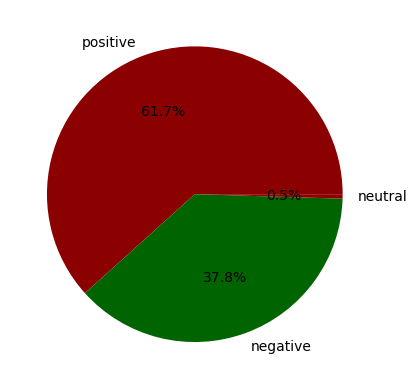

In [17]:
# Plot the sentiment percentages 

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sent_type_percentages,
    labels=sent_type_percentages.index, 
    colors=['darkred', 'darkgreen'], 
    autopct='%1.1f%%'
    )

plt.show()

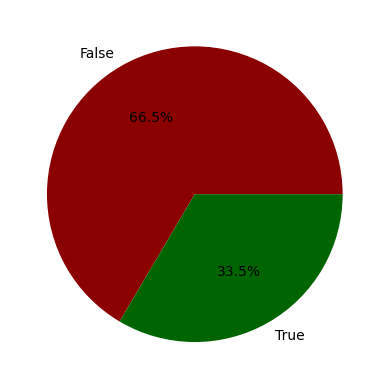

In [18]:
# Plot the verified reviews 
verified_pctg = df['verified'].value_counts(normalize=True)

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    verified_pctg,
    labels=verified_pctg.index, 
    colors=['darkred', 'darkgreen'], 
    autopct='%1.1f%%'
    )

plt.show()

In [19]:
df.to_csv( cwd + "/data/Emirates_sentiment_analysis_data.csv")

In [20]:
# make a frequency chart that will tell us the key topics that are mentioned in the reviews

reviews = df['corpus']

# Convert the reviews into a list of words 

words = []
for review in reviews:
    words.extend(review.split())
    

# Filter out the remaining stopwords

stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]


In [21]:
# Get the top 20 most used words 
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out any of the remaining stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]


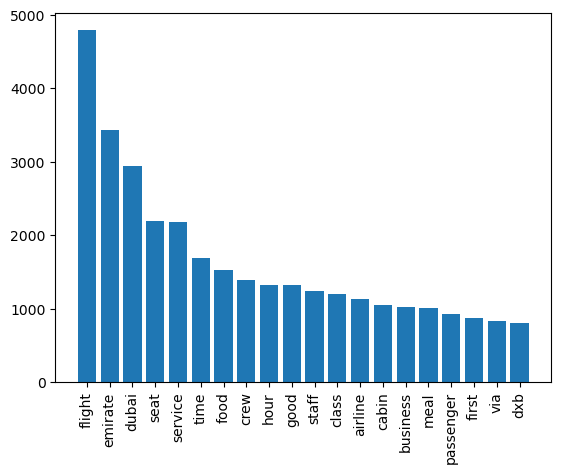

In [22]:
# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()


## Time series analysis

In [23]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date')
fig.show()

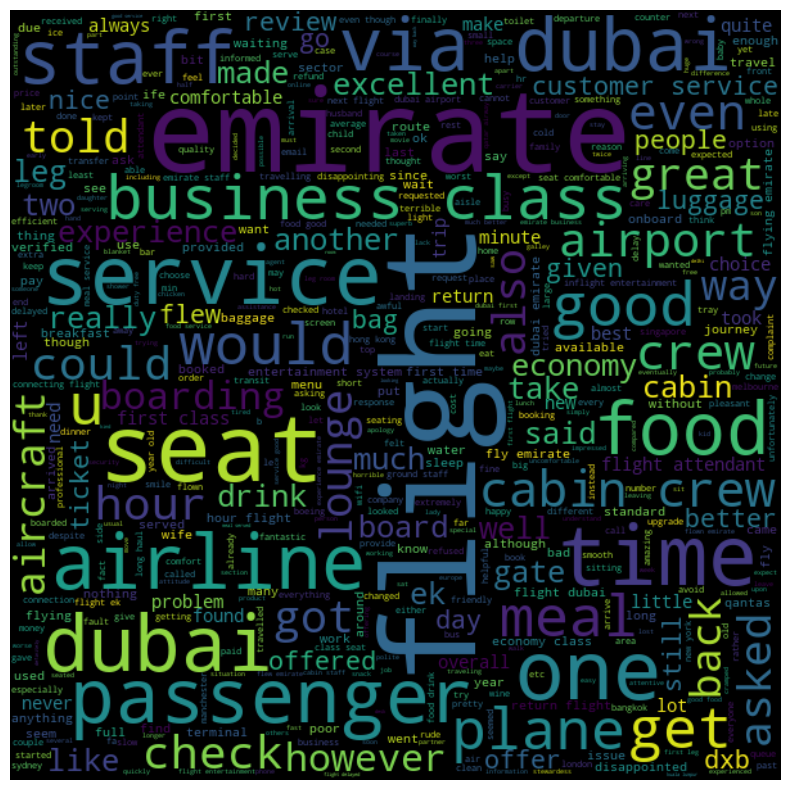

In [24]:
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'emirates', "said", "passenger","u","airway","airline",
                                           "dubai","plane","via","dxb"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

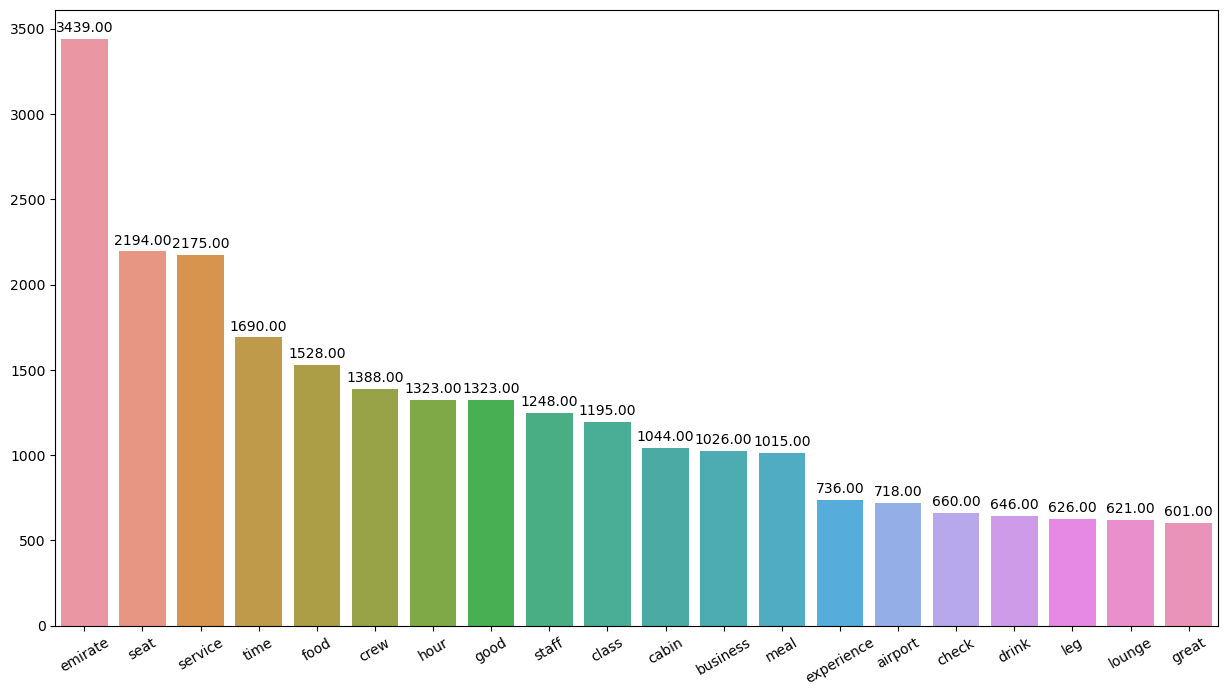

In [26]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)

# Add labels to the bars
for container in all_plot.containers:
    for rect in container:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=30)

# Display the plot
plt.show()

### <b> Word Frequency using N-gram </b>

<AxesSubplot:>

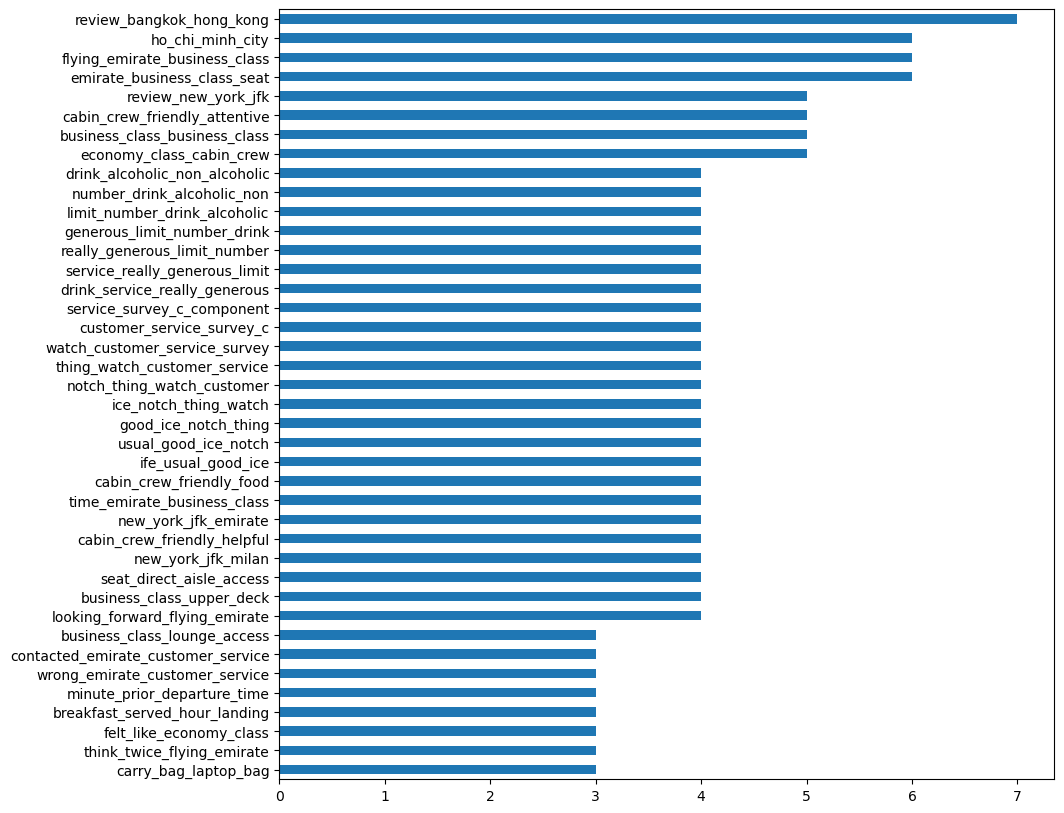

In [27]:
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    # Generate n-grams
    ngrams_list = list(ngrams(new_words, number_of_ngrams))

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' and maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax

get_freq_dist(new_words, 4)


In [28]:
%%capture
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0


In [29]:
df.label.value_counts()


 1    1537
-1     651
 0      87
Name: label, dtype: int64

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an object of CountVectorizer
vect = CountVectorizer()

# Convert the corpus to a list of strings (if not already)
corpus = df.corpus.tolist()

# Apply transformation
tf = vect.fit_transform(corpus)
tf_array = tf.toarray()

# Get the feature names
tf_feature_names = vect.get_feature_names_out()

In [31]:
#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic = pd.DataFrame(topic_dict)

df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,326.3,emirate,942.4,seat,168.0,emirate,259.8,flight,1507.5,flight,1489.2,flight,240.0,ticket,8.3
1,class,293.4,dubai,922.3,meal,107.6,flight,208.8,emirate,1074.1,seat,924.7,seat,216.7,mile,7.2
2,business,240.0,flight,920.7,flight,102.2,dubai,131.6,dubai,818.0,dubai,804.9,meal,130.3,de,7.1
3,service,239.2,service,614.8,dubai,84.7,carry,109.2,hour,589.4,food,791.9,service,113.0,et,5.1
4,emirate,230.0,seat,601.7,baby,78.8,ticket,109.0,staff,415.0,emirate,790.7,hour,112.6,le,4.9
5,lounge,198.6,class,487.5,one,74.7,kg,93.9,airline,401.7,crew,741.7,passenger,106.8,orlando,4.8
6,dxb,191.5,good,443.3,asked,72.7,pay,93.5,service,379.4,service,727.1,time,105.0,colombo,4.7
7,food,181.3,time,430.8,drink,70.7,luggage,92.9,would,372.2,good,687.5,one,100.8,qui,4.1
8,time,160.0,business,406.7,old,69.0,refund,90.5,time,370.5,cabin,564.3,emirate,96.9,pa,4.0
9,first,156.4,crew,393.7,take,68.8,bag,76.5,customer,360.7,dxb,514.9,staff,95.4,price,3.9


### <b> Topic modeling with NMF

In [32]:
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.1261855 , 0.10786892],
       [0.01965089, 0.0467106 ],
       [0.33911677, 0.        ],
       ...,
       [0.05368657, 0.0234661 ],
       [0.13793244, 0.19278553],
       [0.04651615, 0.14717565]])

In [33]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,31.6,seat,11.1
1,emirate,13.9,service,7.6
2,dubai,11.9,class,6.5
3,hour,9.4,emirate,6.5
4,would,5.6,food,5.7
5,staff,5.5,good,5.7
6,time,5.2,business,5.6
7,airport,4.9,crew,5.5
8,airline,4.0,cabin,4.6
9,told,3.7,dubai,4.6
